<a href="https://colab.research.google.com/github/chaecheche/24w_audio/blob/main/connect_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prerequisties

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#!pip install warp_rnnt
#!pip install torchaudio==0.6.0
#!pip install hydra-core --upgrade

################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
'''! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!which conda  # should return /usr/local/bin/conda
!conda --version'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=31b2480bb8ef4686ed2f343aac0fba9c3c65c9f38bd0afdf6f8d5922ac4e832c
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


"! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh\n! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh\n! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local\nimport sys\nsys.path.append('/usr/local/lib/python3.7/site-packages/')\n!which conda  # should return /usr/local/bin/conda\n!conda --version"

In [ ]:
pwd

'/content'

In [ ]:
!pip install -r /content/drive/MyDrive/kospeech/dataset/kspon/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661762 sha256=1d8d6e19ec3f23aa343491eeba52810e5a84fbc72c43b8a18088d5b01c918fbf
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp


## Deep Speech2를 이용한 Ko-SPEECH 학습

### 학습 준비
- 전처리 및 단어 사전 준비
- 전사 자료의 벡터화
-> 결론적으로 학습을 위해서 transscript.txt(대본같은 역할)를 생성해야함

필요한 데이터는 크게 음성 데이터(wav, pcm 등)와 해당 음성 파일의 전사 데이터가 필요

In [ ]:
# 압축해제
#!unzip -qq "/content/drive/MyDrive/한국어_방언_발화(경상도)/Training/[라벨]경상도_학습데이터_1.zip" -d "/content/drive/MyDrive/한국어_방언_발화(경상도)/unzip"

!unzip -qq "/content/drive/MyDrive/kospeechdata/KsponSpeechall/KsponSpeech_01.zip"

In [ ]:
import re

def rule(x):
    # 괄호
    a = re.compile(r'\([^)]*\)')
    # 문장 부호
    b = re.compile('[^가-힣 ]')
    x = re.sub(pattern=a, repl='', string= x)
    x = re.sub(pattern=b, repl='', string= x)
    return x

# 예제 문장
x = "&company-name2&요거."

# 처리 결과 출력
result = rule(x)
print(result)

요거


## Preprocessing!

In [ ]:
# 데이터 갯수(큰 폴더 개수) 구하는 코드
import os

def count_subfolders(directory):
    if not os.path.isdir(directory):
        return "Invalid directory path"

    subfolders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    return len(subfolders)

# Example usage:
directory_path = '/content/drive/MyDrive/DKSR__data_share/Training/train_extracted'
print("Number of subfolders:", count_subfolders(directory_path))

Number of subfolders: 1018


In [ ]:
#데이터 개수 구하는 코드
def count_lines_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        return len(lines)

file_path = '/content/drive/MyDrive/kospeech/test/transcripts.txt'  # 여기에 파일 경로를 입력하세요.
line_count = count_lines_in_file(file_path)
print(f"The file has {line_count} lines.")

The file has 262106 lines.


## 잠깐 보류

In [ ]:
# permission denied 뜨는 거 없애기

!chmod +x /content/drive/MyDrive/kospeech/dataset/kspon/preprocess.sh

In [ ]:
# 초기에 한번 실행했으면 이제 안돌려도 됨
! /content/drive/MyDrive/kospeech/dataset/kspon/preprocess.sh

Pre-process Our Dataset..
Dataset Path : /content/drive/MyDrive/validation_made
Vocab Destination : /content/drive/MyDrive/kospeech/dataset
Save Path : ./data
Output-Unit : character
Preprocess Mode : phonetic
preprocess started..
/content/drive/MyDrive/validation_made/DKSR20002370/DKSR20002370_1_1_120.txt
Traceback (most recent call last):
  File "/content/drive/MyDrive/kospeech/dataset/kspon/main.py", line 80, in <module>
    main()
  File "/content/drive/MyDrive/kospeech/dataset/kspon/main.py", line 62, in main
    audio_paths, transcripts = preprocess(opt.dataset_path, opt.preprocess_mode)
  File "/content/drive/MyDrive/kospeech/dataset/kspon/preprocess/preprocess.py", line 112, in preprocess
    for jdx, file in enumerate(os.listdir(path)):
NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/validation_made/DKSR20002370/DKSR20002370_1_1_120.txt'


3시간 30분 넘게 걸림....

## Training(학습)

In [ ]:
#하하하하하하하22

In [ ]:
!pip install hydra-core --upgrade
!pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=b42b2469c67703c9f90e5cb1977efdcd2120f4e36a53b6466c6e3f4af159be4d
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.4 MB/s eta 0:00:00


In [ ]:
!python /content/drive/MyDrive/kospeech/bin/main.py model=ds2 train=ds2_train train.dataset_path="/content/drive/MyDrive/DKSR__data_share/Training"

## Inference

In [ ]:
# outputs경로를 옮기는 코드
#!cp -rf outputs '/content/drive/MyDrive/'
#trainer.train(resume_from_checkpoint="/content/drive/MyDrive/Colab Notebooks/outputs/checkpoint-1970")

In [ ]:
!pip install omegaconf

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:



!python3 /content/drive/MyDrive/kospeech/bin/inference.py --model_path '/content/drive/MyDrive/kspon_checkpoint_models/outputs/2024_04_01/06-59-01/model.pt' --audio_path '/content/drive/MyDrive/DKSR__data_share/Training/train_extracted/DKSR20002401/DKSR20002401_1_1_2.wav' --device "cpu"

#Output :음성인식 결과 문장이 나옵니다

그쎄 어렸을 때는진 짜렸을 때는 진짜 택도 없는 꿈들이 많다이가뭐눈에 모이면 다하고 싶고 이것도보고 싶고 저것도 하고 싶고 막


## WER(Word Error Rate) 측정

In [ ]:
import Levenshtein as Lev

def wer(ref, hyp ,debug=False):
    r = ref.split()
    h = hyp.split()
    #costs will holds the costs, like in the Levenshtein distance algorithm
    costs = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
    # backtrace will hold the operations we've done.
    # so we could later backtrace, like the WER algorithm requires us to.
    backtrace = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]

    OP_OK = 0
    OP_SUB = 1
    OP_INS = 2
    OP_DEL = 3

    DEL_PENALTY=1 # Tact
    INS_PENALTY=1 # Tact
    SUB_PENALTY=1 # Tact
    # First column represents the case where we achieve zero
    # hypothesis words by deleting all reference words.
    for i in range(1, len(r)+1):
        costs[i][0] = DEL_PENALTY*i
        backtrace[i][0] = OP_DEL

    # First row represents the case where we achieve the hypothesis
    # by inserting all hypothesis words into a zero-length reference.
    for j in range(1, len(h) + 1):
        costs[0][j] = INS_PENALTY * j
        backtrace[0][j] = OP_INS

    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                costs[i][j] = costs[i-1][j-1]
                backtrace[i][j] = OP_OK
            else:
                substitutionCost = costs[i-1][j-1] + SUB_PENALTY # penalty is always 1
                insertionCost    = costs[i][j-1] + INS_PENALTY   # penalty is always 1
                deletionCost     = costs[i-1][j] + DEL_PENALTY   # penalty is always 1

                costs[i][j] = min(substitutionCost, insertionCost, deletionCost)
                if costs[i][j] == substitutionCost:
                    backtrace[i][j] = OP_SUB
                elif costs[i][j] == insertionCost:
                    backtrace[i][j] = OP_INS
                else:
                    backtrace[i][j] = OP_DEL

    # back trace though the best route:
    i = len(r)
    j = len(h)
    numSub = 0
    numDel = 0
    numIns = 0
    numCor = 0
    if debug:
        print("OP\tREF\tHYP")
        lines = []
    while i > 0 or j > 0:
        if backtrace[i][j] == OP_OK:
            numCor += 1
            i-=1
            j-=1
            if debug:
                lines.append("OK\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_SUB:
            numSub +=1
            i-=1
            j-=1
            if debug:
                lines.append("SUB\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_INS:
            numIns += 1
            j-=1
            if debug:
                lines.append("INS\t" + "****" + "\t" + h[j])
        elif backtrace[i][j] == OP_DEL:
            numDel += 1
            i-=1
            if debug:
                lines.append("DEL\t" + r[i]+"\t"+"****")
    if debug:
        lines = reversed(lines)
        for line in lines:
            print(line)
        print("Ncor " + str(numCor))
        print("Nsub " + str(numSub))
        print("Ndel " + str(numDel))
        print("Nins " + str(numIns))
    return numCor, numSub, numDel, numIns, (numSub + numDel + numIns) / (float) (len(r))


def cer(ref, hyp):
    ref = ref.replace(' ', '')
    hyp = hyp.replace(' ', '')
    dist = Lev.distance(hyp, ref)
    length = len(ref)
    return dist, length, dist/length

In [ ]:
import os
import glob
import shutil
# 검색할 디렉토리 경로 설정
source_directory = '/content/drive/MyDrive/validation_made/DKSR20002370'

# 새 폴더(이동할 디렉토리) 설정
destination_directory =  '/content/drive/MyDrive/validation_made/DKSR20002370_only_wave'

# 새 디렉토리 생성, 이미 존재하면 넘어감
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# 해당 디렉토리와 모든 하위 디렉토리에서 .wav 파일 검색
txt_files = glob.glob(f'{source_directory}/**/*.wav', recursive=True)

# 각 .txt 파일 이동
for file_path in txt_files:
    try:
        # 이동할 새 경로 생성
        new_path = os.path.join(destination_directory, os.path.basename(file_path))

        # 파일 이동
        shutil.move(file_path, new_path)
        print(f'Moved: {file_path} to {new_path}')
    except OSError as e:
        print(f"Error moving {file_path} to {new_path}: {e.strerror}")

In [ ]:


!python3 /content/drive/MyDrive/kospeech/bin/inference_wer.py --model_path '/content/drive/MyDrive/kspon_checkpoint_models/outputs/2024_04_01/06-59-01/model.pt' --audio_path '/content/drive/MyDrive/validation_made/DKSR20002370' --transcript_path '/content/drive/MyDrive/kospeech/data/transcripts.txt' --device "cpu"



299 files test starts...
CER/WER caculation: True
-> transcript: /content/drive/MyDrive/kospeech/data/transcripts.txt
Output destination: /content/outputs
Traceback (most recent call last):
  File "/content/drive/MyDrive/kospeech/bin/inference_wer.py", line 87, in <module>
    shutil.rmtree(dst_path)
  File "/usr/lib/python3.10/shutil.py", line 725, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/usr/lib/python3.10/shutil.py", line 633, in _rmtree_safe_fd
    onerror(os.scandir, path, sys.exc_info())
  File "/usr/lib/python3.10/shutil.py", line 629, in _rmtree_safe_fd
    with os.scandir(topfd) as scandir_it:
NotADirectoryError: [Errno 20] Not a directory: '/content/outputs/wer_results_2024_04_01_06-59-01.txt'


## Checkpoints
Checkpoints are organized by experiments and timestamps as shown in the following file structure.

#### outputs
##### +-- YYYY_mm_dd
##### |  +-- HH_MM_SS
#####   |  +-- trainer_states.pt
#####   |  +-- model.pt
You can resume and load from checkpoints.

# KO_BART

In [ ]:
model_path= '/content/drive/MyDrive/saved_model'

model_name = "gogamza/kobart-base-v2"

from transformers import pipeline

nlg_pipeline=pipeline('text2text-generation',model=model_path,tokenizer=model_name)


def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    #num_return_sequences의 값에 따라서 반환되는 텍스트의 개수가 바뀐다. 만약 3으로 지정했다면 길이가 3인 리스트에 담겨서 값이 반환될 것임!
    return [x['generated_text'] for x in out]


print("Write 'q' to exit")
while True:
    src_text=input("Dialect to translate(입력받을 사투리) : ")
    if src_text == 'q':
        break
    target_text_ko=generate_text(nlg_pipeline,src_text,num_return_sequences=1,max_length=64)[0]
    print(f"Translated Standard (표준어로 출력): {target_text_ko}")

OSError: Incorrect path_or_model_id: '/content/drive/MyDrive/saved_model'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

# 최종 연결!!(Ko-Speech & Ko-BART& Tensorflow-TTS)

## Ko=BART 불러오기

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from transformers import pipeline

model_path= '/content/drive/MyDrive/saved_model'
model_name = "gogamza/kobart-base-v2"


nlg_pipeline=pipeline('text2text-generation',model=model_path,tokenizer=model_name)


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


tokenizer.json:   0%|          | 0.00/682k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


### TensorflowTTS(Fast-Speech2) 불러오기

In [ ]:
#!pip install h5py==2.10
#!pip install git+https://github.com/repodiac/german_transliterate
%cd '/content/drive/MyDrive'

print("Downloading FastSpeech2 model...")
!gdown --id {"1adb_hA9q0Qg959bl70WiRpm5a9Hdc2Ym"} -O fastspeech2-200k.h5



import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS.git
os.chdir("TensorFlowTTS")
!pip install .
os.chdir("..")

import sys
sys.path.append("TensorFlowTTS/")
import tensorflow as tf
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

os.chdir("/content/drive/MyDrive/TensorFlowTTS")
!pip install .
os.chdir("..")

import sys
sys.path.append("/content/drive/MyDrive/TensorFlowTTS/")

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

fastspeech2_config = AutoConfig.from_pretrained('/content/drive/MyDrive/TensorFlowTTS/examples/fastspeech2/conf/fastspeech2.kss.v1.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="fastspeech2-200k.h5",
    name="fastspeech2"
)

# Vocoder model (mel spectrogram -> audio)
# 멜로디 생성 모델을 사용합니다.
mb_melgan_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="mb.melgan-1000k.h5",
    name="mb_melgan"
)
 # input text를 inference시 숫자로 이뤄진 sequence로 변환할 때 필요합니다.
processor = AutoProcessor.from_pretrained(pretrained_path="./kss_mapper.json")

# 직접 음성합성을 진행하는 함수입니다.
# text -> mel spectrogram model, vocoder model을 인자로 선택합니다.
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.2], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  # tacotron2면 attention graph도 함께 반환합니다.
  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()
# attention을 시각화해서 보여주는 함수입니다.
# tacotron2의 encoder와 decoder가 어떠한 mapping을 형성하는지 보여줍니다.
def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Encoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Decoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()


def visualize_mel(alignment_history) :
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()


/content/drive/MyDrive
Processing /content/drive/MyDrive/TensorFlowTTS
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflowtts to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.7.0 (from tensorflowtts) (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.7.0
Processing /content/drive/MyDrive/TensorFlowTTS
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflowtts to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.7.0 (from 

ModuleNotFoundError: No module named 'jamo'

## Ko-Speech version

Ko-Speech 결과(음성인식) :  그런 어떤 쫌 들어?
Translated Standard (표준어로 출력): 그런 어떤 조금 들어?


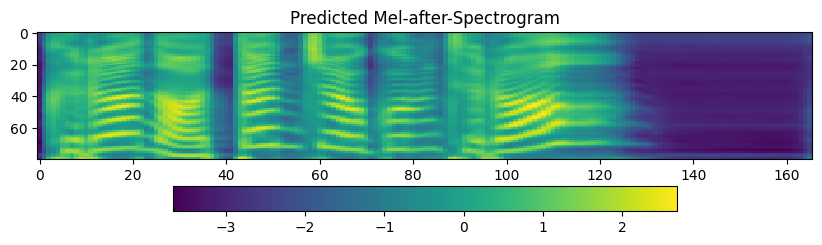

In [ ]:
def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    #num_return_sequences의 값에 따라서 반환되는 텍스트의 개수가 바뀐다. 만약 3으로 지정했다면 길이가 3인 리스트에 담겨서 값이 반환될 것임!
    return [x['generated_text'] for x in out]


src_text = !python3 /content/drive/MyDrive/kospeech/bin/inference.py --model_path '/content/drive/MyDrive/kospeechdata/models/30000/model.pt' --audio_path '/content/drive/MyDrive/DKSR__data_share/Training/train_extracted/DKSR20002401/DKSR20002401_1_1_21.wav' --device "cpu"
src_text = str(src_text)[2:-2]
print("Ko-Speech 결과(음성인식) : ", src_text)

target_text_ko = generate_text(nlg_pipeline,src_text,num_return_sequences=1,max_length=64)[0]
print(f"Translated Standard (표준어로 출력): {target_text_ko}")


mels, audios = do_synthesis(target_text_ko, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

## Whisper ver

In [ ]:
# whisper 다운로드
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

In [ ]:
# 파이프라인 연결
import re
start_time  = time.time()

def generate_text(pipe, text, num_return_sequences, max_length):
    target_style_name = "표준어"
    text = f"{target_style_name} 말투로 변환:{text}"
    out = pipe(text, num_return_sequences=num_return_sequences, max_length=max_length)
    return [x['generated_text'] for x in out]

src_text = !whisper "/content/drive/MyDrive/24w_deepdaiv/drama.wav" --model medium --language Korean
src_text = [re.sub(r'\[.*?\]\s*', '', text) for text in src_text]
src_text = rule(str(src_text))
print("Ko-Speech Result (음성 인식) : ", src_text)

target_text_ko = generate_text(nlg_pipeline,src_text,num_return_sequences=1,max_length=64)[0]
print(f"Translated Standard Result (표준어체로 출력): {target_text_ko}")

mels, audios = do_synthesis(target_text_ko, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
print("최종 출력 표준어 발화 : ")
visualize_mel_spectrogram(mels[0])
output_wav = ipd.Audio(audios, rate=22050)
output_wav